##### Name - Ahaan Tagare

##### Student ID -33865799

#### Subject - Machine Learning (Coursework -1)

#### Machine Learning-Based Oral Temperature Prediction and Fever Detection using Infrared Thermography

##### Abstract

This study looks at using machine learning to predict oral temperatures with infrared thermography data in two modes: Fast and Monitor. Both regression and classification were used to model temperature values and detect fever. This study explores machine learning models to predict oral temperatures using infrared thermography data in Fast and Monitor modes. Both regression and classification approaches were applied. Regression models included Neural Networks, Random Forest, eXtreme Gradient Boosting, and Linear and Polynomial Regression . Classification models included Logistic Regression, Random Forest, eXtreme Gradient Boosting and Neural Networks. Data preprocessing involved handling missing values and outliers to ensure high-quality input. Feature engineering and model tuning were performed to improve predictive performance.

The choice of models focused on matching the task, with more complex algorithms performing well for complicated patterns, and simpler models doing better with straightforward relationships. This analysis shows how important it is to choose the right approach based on the data, especially in medical applications where accuracy and reliability are crucial. By improving data preparation, optimizing models, and considering how to interpret results, this work helps make infrared thermography a useful tool for predicting temperatures without invasive methods. The findings show how machine learning can improve healthcare processes and the importance of adapting models to meet different clinical needs.

##### Introduction 

In medical settings, measuring temperature accurately is important for diagnosing illnesses. Traditional thermometers, like oral ones, can sometimes be uncomfortable and may not always give perfect readings. Infrared thermography is a faster and non-contact method that has become popular for checking body temperature. However, predicting oral temperature using infrared readings is tricky because the data can vary a lot. This study explores how machine learning can help improve these predictions in two ways: Fast Mode, which gives quick results, and Monitor Mode, which tracks temperature over time.


##### Libraries

This code imports several powerful libraries for data analysis and visualization. NumPy is used for numerical operations, handling arrays and matrices efficiently. Pandas is great for working with structured data, like tables or CSV files, allowing easy manipulation and analysis. Matplotlib and Seaborn are used for creating various visualizations like charts and plots to help understand data patterns. SHAP is a library for explaining machine learning models, showing how individual features contribute to predictions. Finally, NetworkX is used to work with complex networks, allowing the creation and analysis of graphs, such as social networks or text relationships.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import networkx as nx
import warnings
import shap

This code imports several useful libraries and tools for machine learning tasks. train_test_split helps split data into training and testing sets, while GridSearchCV and cross_val_score are used for model tuning and evaluating performance. StandardScaler, OneHotEncoder, and other preprocessing tools prepare data for modeling. mean_squared_error, accuracy_score, and other metrics are used to evaluate model performance. LogisticRegression, RandomForest, and XGBoost are popular algorithms for classification and regression tasks. MLPRegressor and MLPClassifier represent neural network models. SMOTE helps handle class imbalances, and KNNImputer fills missing values. winsorize is used for handling extreme outliers, and fetch_ucirepo imports datasets from the UCI repository for analysis.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix, roc_curve, precision_recall_curve)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc

##### Methodology 

The process starts with data collection, where the raw data is gathered. The next step is preprocessing, where techniques like KNN imputation, Winsorization, OneHot encoding, and robust scaling are used to clean and prepare the data for analysis. Model training follows, involving both regression models (like Random Forest, XGBoost, and Neural Networks) and classification models (such as Logistic Regression, Random Forest, and XGBoost, NN). Afterward, hyperparameter tuning is conducted using GridSearchCV with cross-validation to optimize model performance. The model evaluation phase measures the model’s effectiveness using metrics like MSE, R² and others for regression, and F1, AUC and others for classification. Finally, the interpretation and conclusion phase summarizes the findings and presents actionable insights. This structured flow ensures a comprehensive approach to solving machine learning problems.

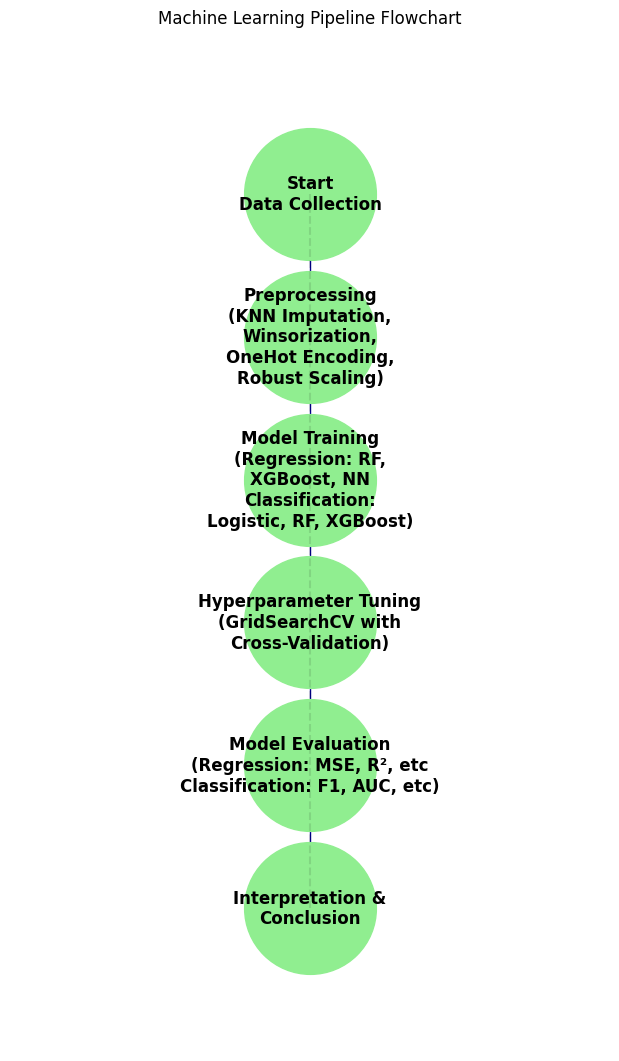

In [30]:
G = nx.DiGraph()
nodes = {
    'A': "Start\nData Collection",
    'B': "Preprocessing\n(KNN Imputation,\nWinsorization,\nOneHot Encoding,\nRobust Scaling)",
    'C': "Model Training\n(Regression: RF,\nXGBoost, NN\nClassification:\nLogistic, RF, XGBoost)",
    'D': "Hyperparameter Tuning\n(GridSearchCV with\nCross-Validation)",
    'E': "Model Evaluation\n(Regression: MSE, R², etc\nClassification: F1, AUC, etc)",
    'F': "Interpretation &\nConclusion"
}
for key, label in nodes.items():
    G.add_node(key, label=label)
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F')]
G.add_edges_from(edges)
pos = {
    'A': (0, 0),
    'B': (0, -1),
    'C': (0, -2),
    'D': (0, -3),
    'E': (0, -4),
    'F': (0, -5)
}
plt.figure(figsize=(6, 10))
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels,
        node_size=9000, 
        node_color="lightgreen",
        edge_color="darkblue",
        font_size=12,    
        font_weight="bold",
        arrows=False,
        connectionstyle="arc3,rad=0")
plt.plot([0, 0], [0, -5], 'k--', alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-6, 1)
plt.title("Machine Learning Pipeline Flowchart", pad=20)
plt.axis('off')  
plt.show()


#### Data Importation

This code imports a dataset called infrared_thermography_temperature from the UCI repository using the fetch_ucirepo function. The dataset contains data about temperature measurements from infrared thermography. The X variable stores the features or input data (like sensor readings), and y stores the targets or output data (like temperature labels or fever detection).






In [3]:
infrared_thermography_temperature = fetch_ucirepo(id=925)
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets

This code converts the feature data X and target data y into DataFrames, making it easier to handle and analyze. X_df holds the feature data, and y_df holds the target data. DataFrames provide a structured format for working with the data, like tables in a spreadsheet.

In [4]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)


#### Data exploration

The code prints the first and last 5 rows of both the features and target variables in the dataset. For the features, it displays the first and last 5 data points, including columns like gender, age, ethnicity, and various temperature-related measurements. It helps to inspect the structure and content of the data, ensuring everything is loaded correctly. For the target variables, it prints the first and last 5 rows of the oral temperature measurements for both females (aveOralF) and males (aveOralM), which are used in regression tasks to predict temperature.

In [5]:
print("First 5 rows of features:")
print(X_df.head())

print("\nLast 5 rows of features:")
print(X_df.tail())

print("\nFirst 5 rows of target:")
print(y_df.head())

print("\nLast 5 rows of target:")
print(y_df.tail())

First 5 rows of features:
   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   

   T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
0  33.3725 

The first 5 rows of features show demographic information (e.g., gender, age) along with temperature-related variables, with values like 24°C for T_atm and various temperatures in columns like Max1R13_1. Similarly, the last 5 rows of features show more data points with values for each feature. The target variables (aveOralF and aveOralM) for both genders show oral temperature values, with the first 5 rows indicating values ranging between 36.85 and 37.20°C. The last 5 rows of the target data show temperature values in a similar range, confirming the dataset’s consistency and expected temperature range.

##### Handling missing values 

The below code checks for missing values in both the features and target variables. It uses the isnull().sum() method to calculate the total number of missing values in each column. For the features, it prints the columns with missing values. Similarly, for the target variables, it prints the columns with missing values, if any, to help identify where data imputation or cleaning will be required.


In [6]:
missing_X = X_df.isnull().sum()
missing_y = y_df.isnull().sum()

print("Missing values in features:\n", missing_X[missing_X > 0])
print("\nMissing values in targets:\n", missing_y[missing_y > 0])

Missing values in features:
 Distance    2
dtype: int64

Missing values in targets:
 Series([], dtype: int64)


The output indicates that the "Distance" feature has 2 missing values. There are no missing values in the target variables (aveOralF and aveOralM). This means that only the feature data needs to be addressed for imputation or further cleaning, while the target data is complete and does not require any handling of missing values.

##### Imputing Missing Values using KNN

Why KNN? 
- We used the "Distance" column in the KNN imputation because it had missing values that needed to be filled. The KNN algorithm helps in this scenario by looking at the existing values in the "Distance" column. It then identifies the nearest neighbors based on similarity and fills in the missing values with averages from the closest points. Using this method ensures that the imputed values are more likely to be similar to the non-missing ones. This technique helps maintain the integrity of the data by making educated guesses based on patterns in the column. By using KNN, we avoid simply filling in the missing values with arbitrary values like the mean.








In [7]:
imputer = KNNImputer(n_neighbors=5)
X_df['Distance'] = imputer.fit_transform(X_df[['Distance']])

The code uses K-Nearest Neighbors (KNN) to fill missing values in the 'Distance' column. The KNNImputer method calculates the missing values based on the average of the 5 nearest neighbors for each missing value. The fit_transform function applies this imputation on the 'Distance' column. After running this code, any missing values in the 'Distance' column are replaced with the average of the nearest 5 valid values. This method ensures the missing data is filled using similar, non-missing data points from the same column.

In [8]:
print("NaNs in raw features after imputation:\n", X_df.isna().sum())

NaNs in raw features after imputation:
 Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


The above code checks for any missing values (NaNs) in the features after the imputation process. The isna().sum() function counts the number of missing values in each column. After applying the KNN imputer to the 'Distance' column, it prints the number of missing values in all columns. The result shows that there are no missing values left in any of the features, confirming that all NaNs have been successfully filled.

##### Handling Outliers



This code defines a data preprocessing pipeline for handling both categorical and numerical features in a dataset, ensuring that they are appropriately transformed before being used in machine learning models. For numerical features, the pipeline applies Winsorization to limit extreme values by capping them at the 5th and 95th percentiles. This reduces the impact of outliers without discarding data, ensuring that the model is not overly influenced by extreme values. Afterward, the RobustScaler is applied, which scales the data based on the median and interquartile range (IQR), making it less sensitive to outliers compared to traditional scalers (Ref -2). Categorical features, such as 'Gender' and 'Ethnicity,' are handled using OneHotEncoding, which transforms them into a format that machine learning models can process effectively.

In [9]:
def winsorize_transform(X):
    return winsorize(X, limits=[0.05, 0.05], axis=0)

# pipeline
cat_cols = ['Gender', 'Age', 'Ethnicity']
num_cols = [col for col in X_df.columns if col not in cat_cols]

num_pipeline = Pipeline([
    ('winsorize', FunctionTransformer(winsorize_transform)),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

This approach is particularly useful in your project as it addresses common data challenges effectively. By applying Winsorization and the RobustScaler, the pipeline ensures that extreme values are controlled, preventing them from skewing the model’s performance. This is essential in real world datasets where outliers can often distort results. Additionally, using OneHotEncoding ensures that categorical features are represented numerically, making them compatible with machine learning algorithms. The combination of these techniques makes the pipeline both robust and efficient, as it can handle diverse data types and challenges. Compared to other techniques, such as removing outliers or standard scaling, this approach is less likely to distort the data and helps improve the stability and accuracy of the machine learning model.

##### Combine features and prepare targets

This code is preparing the dataset for both regression and classification tasks. First, it combines the feature set (X_df) and the target set (y_df) into one unified DataFrame called data, making it easier to work with all variables together. The features (X) are extracted from the data DataFrame, and the target variable (y) is separated as well. For regression, the targets y_reg_f and y_reg_m represent the average oral temperature in Fahrenheit and Celsius, respectively. These are continuous variables, and we'll use them for predicting temperature values.

In [10]:
# Combine features and targets
data = pd.concat([X_df, y_df], axis=1)
X = data[X.columns]
y = data[y.columns]

In [11]:
# targets
y_reg_f = y['aveOralF']
y_reg_m = y['aveOralM']
y_clf_f = (y['aveOralF'] >= 37.5).astype(int)
y_clf_m = (y['aveOralM'] >= 37.5).astype(int)

In addition, for classification tasks, the code converts the temperature values into binary targets (y_clf_f and y_clf_m). If the temperature is 37.5°C or higher, it’s considered a fever (marked as 1); otherwise, it’s labeled as 0 (no fever). This conversion allows us to use the same dataset for both types of tasks. The regression targets are useful for predicting the actual temperature, while the classification targets help in detecting whether a person has a fever or not based on the temperature. By preparing these separate targets, we can build models that cater to both tasks.

##### Analyzing distributions, class balance, and correlations

The function perform_eda is used for exploratory data analysis (EDA) to visualize the distributions of the target variables. It creates a combined DataFrame df_full by joining the feature set X with the target variables y_reg_f and y_reg_m for oral temperatures. It then plots four graphs: two histograms to show the distributions of the continuous target variables (average oral temperatures), and two count plots to display the distributions of the binary classification targets (fever detection based on the temperature threshold). This helps in understanding the patterns and distributions in the target data, which is crucial for deciding how to approach modeling.

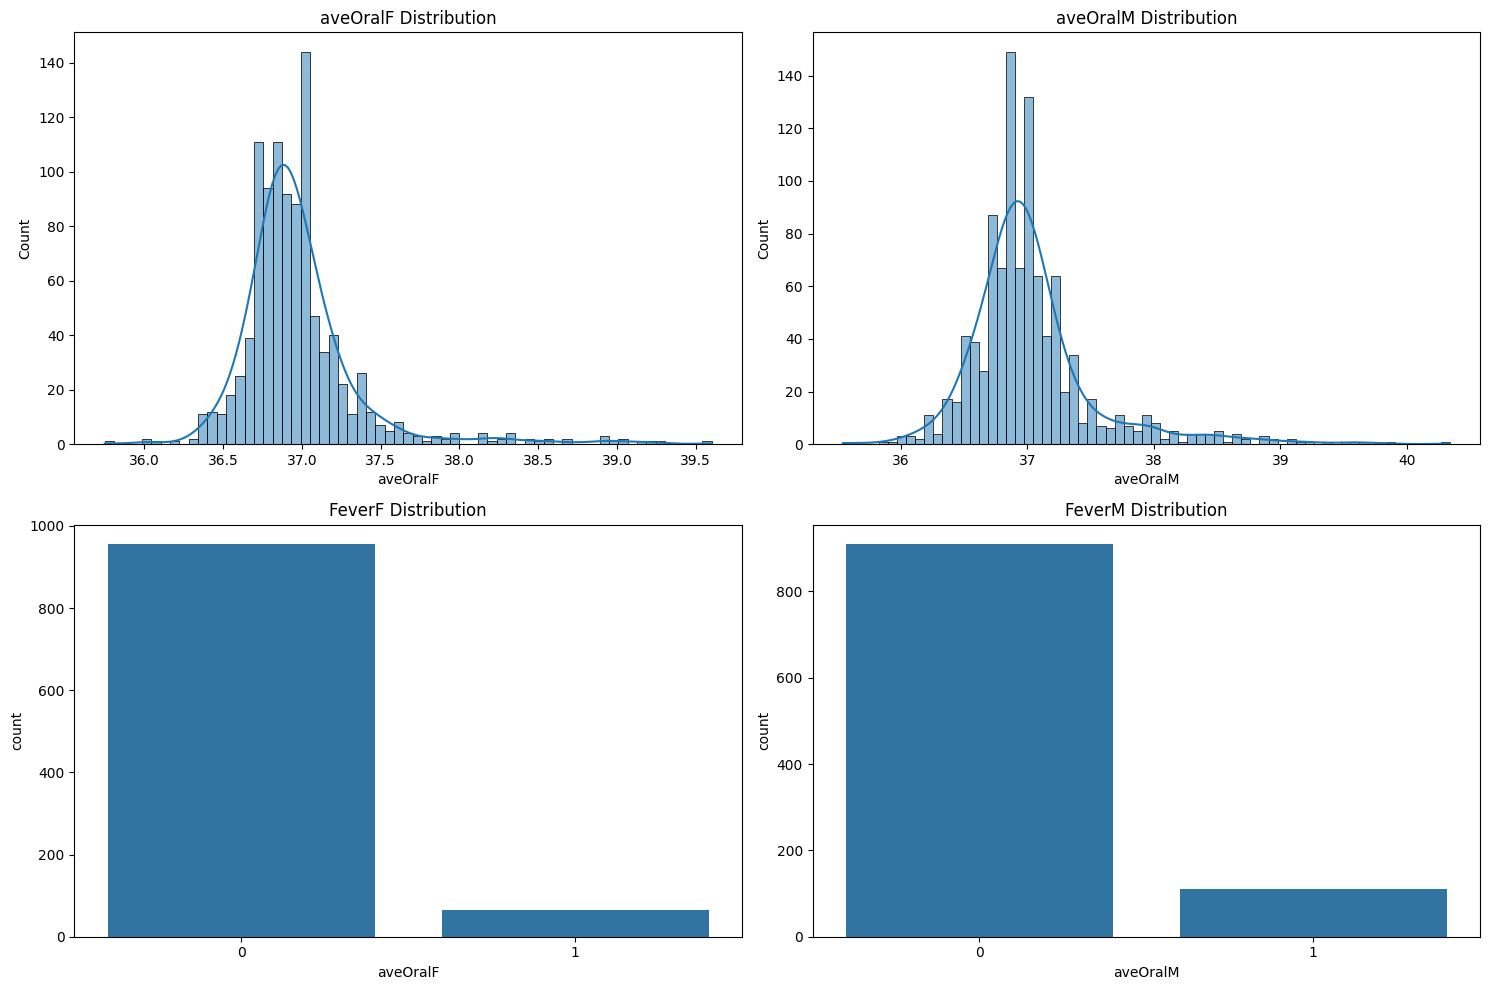

In [12]:
def perform_eda(X, y_reg_f, y_reg_m, y_clf_f, y_clf_m):
    df_full = pd.concat([X, pd.DataFrame({'aveOralF': y_reg_f, 'aveOralM': y_reg_m})], axis=1)
    # Target distributions
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    sns.histplot(y_reg_f, kde=True, ax=ax[0, 0]).set_title('aveOralF Distribution')
    sns.histplot(y_reg_m, kde=True, ax=ax[0, 1]).set_title('aveOralM Distribution')
    sns.countplot(x=y_clf_f, ax=ax[1, 0]).set_title('FeverF Distribution')
    sns.countplot(x=y_clf_m, ax=ax[1, 1]).set_title('FeverM Distribution')
    plt.tight_layout()
    plt.show()

perform_eda(X, y_reg_f, y_reg_m, y_clf_f, y_clf_m)

The code visualizes the distribution of categorical features in the dataset, such as 'Gender', 'Age', and 'Ethnicity', using count plots. It also provides a summary of the numerical features through descriptive statistics and displays a boxplot for numerical features (excluding the categorical ones) to highlight the spread and potential outliers. This helps in understanding the balance of categorical variables and the range of numerical variables, which is crucial for further data processing and model development.


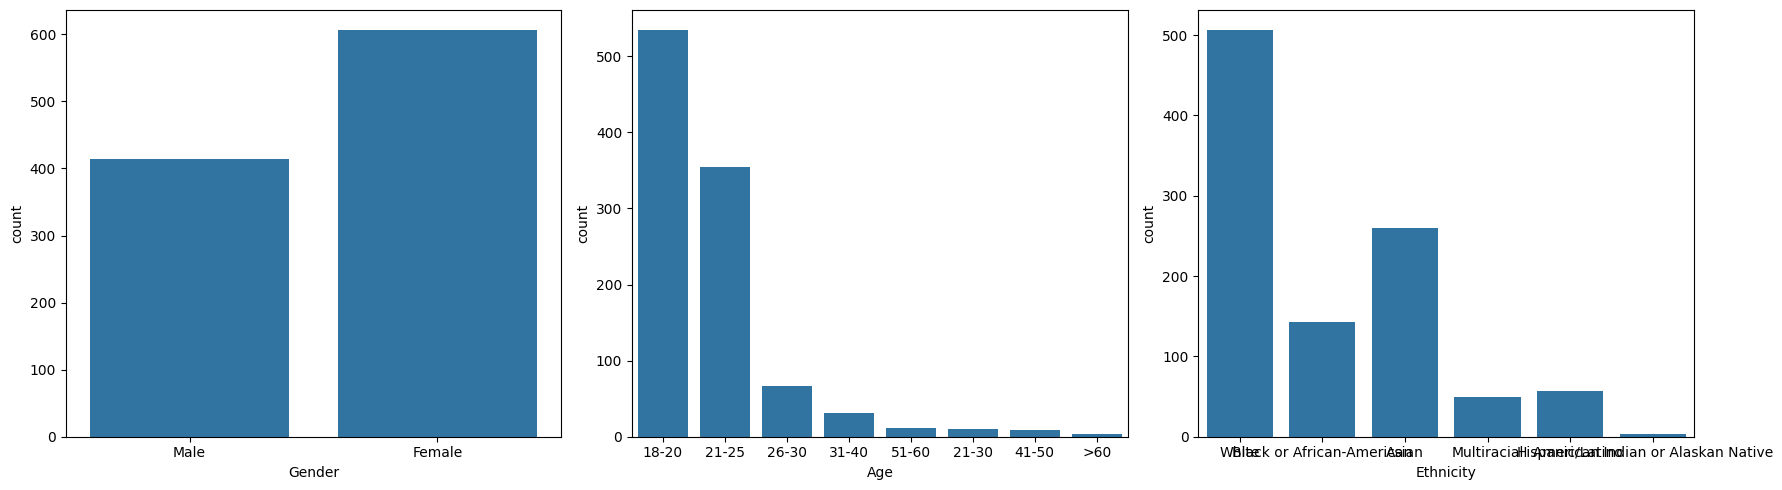

Numerical Features Summary:
              T_atm     Humidity     Distance    T_offset1    Max1R13_1  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean     24.115392    28.723039     0.729784     0.968648    35.596533   
std       1.336338    13.071627     2.454074     0.362587     0.574888   
min      20.200000     9.900000     0.540000    -0.590000    33.897500   
25%      23.400000    17.600000     0.600000     0.772500    35.247500   
50%      24.000000    26.300000     0.620000     0.940000    35.548750   
75%      24.700000    36.200000     0.700000     1.140000    35.872500   
max      29.100000    61.200000    79.000000     2.875000    38.405000   

         Max1L13_1  aveAllR13_1  aveAllL13_1        T_RC1    T_RC_Dry1  ...  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000  ...   
mean     35.611474    34.888475    35.011345    35.659921    35.587143  ...   
std       0.549760     0.718613     0.633836     0.553897     0.569

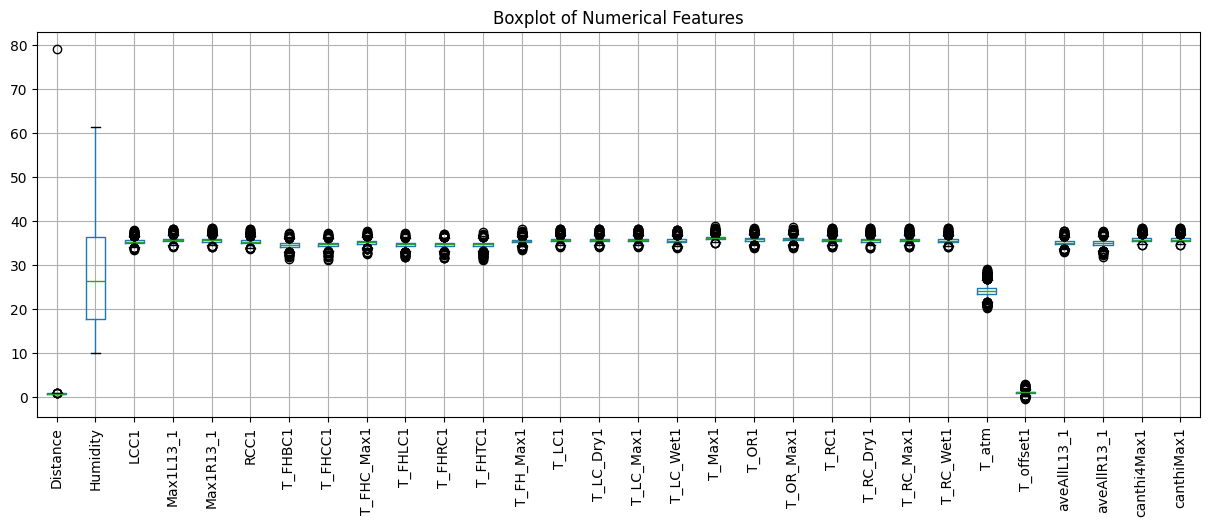

In [13]:
    # Categorical features
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    sns.countplot(x='Gender', data=X, ax=ax[0])
    sns.countplot(x='Age', data=X, ax=ax[1], order=X['Age'].value_counts().index)
    sns.countplot(x='Ethnicity', data=X, ax=ax[2])
    plt.tight_layout()
    plt.show()
    
    print("Numerical Features Summary:\n", X.describe())
    plt.figure(figsize=(15, 5))
    X[X.columns.difference(['Gender', 'Age', 'Ethnicity'])].boxplot()
    plt.xticks(rotation=90)
    plt.title('Boxplot of Numerical Features')
    plt.show()


This summary provides key statistical insights into the dataset’s numerical features. The mean atmospheric temperature (T_atm) is 24.1°C, with a relatively low standard deviation (1.34), indicating minimal variation. Humidity shows significant dispersion, ranging from 9.9% to 61.2%, suggesting diverse environmental conditions. Distance has a high variance, with a maximum value of 79, potentially influencing other parameters. The dataset’s distribution suggests a mix of controlled and fluctuating environmental factors.

#### Data Preprocessing

The below preprocesses data by handling both numerical and categorical columns differently. It first defines cat_cols as categorical columns ('Gender', 'Age', 'Ethnicity') and identifies numerical columns by excluding these from X.columns. The ColumnTransformer is then used to apply StandardScaler to numerical columns, which standardizes them by making their mean 0 and standard deviation 1. For categorical columns, OneHotEncoder converts them into binary columns representing different categories, making sure that categorical data is transformed into a numerical format. The handle_unknown='ignore' option prevents errors when unseen categories appear in the test data. This step ensures that all features are in a format suitable for machine learning models.

In [18]:
cat_cols = ['Gender', 'Age', 'Ethnicity']
num_cols = [col for col in X.columns if col not in cat_cols]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

After preprocessing, numerical features are scaled so their values are balanced and do not affect the model unfairly. Categorical features are changed into multiple columns with 0s and 1s, so the model can understand them. This makes sure the data is fair and helps the model learn better. Scaling numbers helps models like logistic regression work faster and more accurately. Changing categories into numbers helps decision trees and neural networks use them properly. Ignoring unknown categories prevents errors, making the process smooth and reliable. The final data is clean, well-organized, and ready for training, helping the model give better results.

##### Baseline model

The function evaluate_baseline_regressor is used to evaluate the baseline model for regression tasks. It takes in training and test data (X_train, y_train, X_test, y_test) and the target variable's name (target_name). A DummyRegressor is used as the baseline model, which predicts the mean of the training target for all instances. After fitting the model on the training data, it predicts values for the test data. The predictions are then evaluated using the evaluate_regression function, and the resulting metrics are printed. The function is called twice to evaluate the baseline model for both aveOralF and aveOralM.

In [54]:
def evaluate_baseline_regressor(X_train, y_train, X_test, y_test, target_name):
    baseline = DummyRegressor(strategy="mean")
    baseline.fit(X_train, y_train)
    y_pred_baseline = baseline.predict(X_test)
    metrics = evaluate_regression(y_test, y_pred_baseline)
    print(f"Baseline Metrics for {target_name} (Regression):\n", pd.Series(metrics))

evaluate_baseline_regressor(X_train_reg, y_train_reg_f, X_test_reg, y_test_reg_f, 'aveOralF')
evaluate_baseline_regressor(X_train_reg, y_train_reg_m, X_test_reg, y_test_reg_m, 'aveOralM')


Baseline Metrics for aveOralF (Regression):
 MSE     0.120500
RMSE    0.347131
MAE     0.233728
R2     -0.001260
dtype: float64
Baseline Metrics for aveOralM (Regression):
 MSE     0.210615
RMSE    0.458928
MAE     0.314622
R2     -0.000204
dtype: float64


The baseline models show poor performance because they simply predict the mean of the target variable without taking into account any features or patterns in the data. The negative R2 value indicates that the model's predictions are worse than just predicting the mean for all observations. The high values for MSE, RMSE, and MAE further highlight the large discrepancy between the predicted and actual values, meaning the baseline predictions are far from the true values. Since the baseline model does not learn from the data, it cannot capture any meaningful relationships between the features and the target. This suggests that more advanced models, which can learn from the data and make predictions based on patterns, would result in significantly better performance.

#### Regression Models

##### Data Splitting 

This code splits the dataset into training and testing sets. The first line splits the data into training and testing sets for the target variable y_reg_f. The second line does the same for the target variable y_reg_m, but it ignores the feature data X by using _. Both splits reserve 20% of the data for testing and 80% for training, with a fixed random seed for reproducibility.

In [19]:
# Data Splitting 
X_train_reg, X_test_reg, y_train_reg_f, y_test_reg_f = train_test_split(X, y_reg_f, test_size=0.2, random_state=42)
_, _, y_train_reg_m, y_test_reg_m = train_test_split(X, y_reg_m, test_size=0.2, random_state=42)

##### 1. Linear Regression:
Linear regression is a basic regression model that predicts a target variable by finding the best-fitting straight line through the data. It assumes a linear relationship between the features and the target. This model is easy to understand and implement. It is used when the data has a linear relationship between input and output.

- Formula: 
  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$

- **y** → The predicted value (dependent variable).
- **β₀** → The intercept (constant term), which is the value of y when all the x variables are zero.
- **β₁, β₂, ..., βₙ** → The coefficients (weights) for each feature (x₁, x₂, ..., xₙ). These represent the impact of each feature on the predicted value.
- **x₁, x₂, ..., xₙ** → The input features (independent variables).
- The formula represents a linear relationship between the dependent variable (y) and the independent variables (x₁, x₂, ..., xₙ).

---

##### 2. Polynomial Regression:
Polynomial regression is an extension of linear regression that fits a polynomial equation to the data, allowing it to capture non-linear relationships. This model adds powers of the features as predictors. It is useful when the data shows a curving pattern.

- Formula:
  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2^2 + \dots + \beta_n x_n^d $$

- Hyperparameter Tuning: The key hyperparameter is the polynomial degree (`model__poly__degree`), which defines how curved the model will be. Tuning the degree allows the model to fit simple or more complex patterns.

---

##### 3. Random Forest Regression:
Random Forest is an ensemble method that uses multiple decision trees to make predictions. Each tree is built by randomly selecting subsets of features and samples, which helps improve accuracy and reduce overfitting. The final prediction is the average of all the tree predictions.

- Formula: Random forests don't have a specific formula as they are based on decision trees. The final output is the average of predictions from all trees.

- Hyperparameter Tuning:
  - `n_estimators`: The number of trees in the forest.
  - `max_depth`: The maximum depth of each tree. Limiting depth can prevent overfitting.
---
##### 4. XGBoost Regression:
XGBoost is an advanced model based on gradient boosting, which builds trees sequentially, with each tree correcting the errors of the previous one. It is known for its speed and accuracy. It works well with structured data. 

- Formula: 
  $$ y = \sum_{i=1}^{k} f_i(x) $$ 
  where \( f_i(x) \) is the prediction of the \( i \)-th tree.

- Hyperparameter Tuning:
  - `n_estimators`: Number of trees to be built.
  - `learning_rate`: Controls the contribution of each tree to the final prediction (lower values require more trees).

---

##### 5. Neural Network Regression (MLPRegressor):
Neural network regression uses multiple layers of neurons to learn complex patterns in data. Each layer transforms the input data using weights and activation functions, and the output is the prediction. It is suitable for handling large datasets with complex relationships.

- Formula: Neural networks use multiple layers where each layer performs a weighted sum of inputs followed by an activation function.
  $$ y = \sigma(W_1 \cdot x + b_1) \quad \text{(hidden layer)} \quad \sigma(W_2 \cdot \text{hidden} + b_2) \quad \text{(output)} $$

- Hyperparameter Tuning:
  - `hidden_layer_sizes`: Specifies the number of neurons and layers in the network.
  - `alpha`: Regularization term to avoid overfitting by penalizing large weights.



In [20]:
# Regression Models
reg_models = {
    'Linear Regression': (LinearRegression(), {}),
    'Polynomial Regression': (SklearnPipeline([('poly', PolynomialFeatures()), 
                                            ('model', LinearRegression())]), 
                             {'model__poly__degree': [1, 2]}),
    'Random Forest': (RandomForestRegressor(random_state=42), 
                      {'model__n_estimators': [100, 200], 
                       'model__max_depth': [None, 10]}),
    'XGBoost': (XGBRegressor(random_state=42), 
                {'model__n_estimators': [100, 200],
                 'model__learning_rate': [0.01, 0.1]}),
    'Neural Network': (MLPRegressor(random_state=42, max_iter=1000), 
                       {'model__hidden_layer_sizes': [(100,), (50, 50)],
                        'model__alpha': [0.0001, 0.001]})
}


In the given models, several hyperparameters are used to fine-tune the model’s performance. For Linear Regression, no tuning is done, making it a basic model with just the formula $y = \beta_0 + \beta_1 x$. Polynomial Regression adds flexibility by adjusting the polynomial degree, with values of 1 (linear) and 2 (quadratic). Random Forest uses two key parameters: n_estimators (the number of trees in the forest, with values 100 and 200) and max_depth (the maximum depth of trees, set to either None for unlimited depth or 10 to avoid overfitting). XGBoost fine-tunes the number of trees (n_estimators set to 100 or 200) and the learning rate (model__learning_rate set to 0.01 or 0.1), controlling how quickly the model learns.



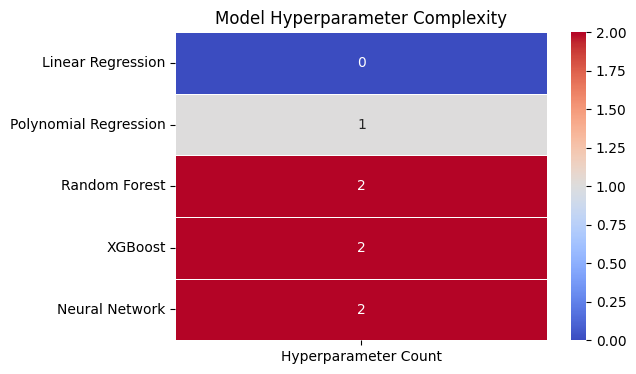

In [23]:
# Define model 
model_names = ["Linear Regression", "Polynomial Regression", "Random Forest", "XGBoost", "Neural Network"]
hyperparam_counts = [0, 1, 2, 2, 2]  # Count of hyperparameters

#  DataFrame
df_complexity = pd.DataFrame(hyperparam_counts, index=model_names, columns=["Hyperparameter Count"])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_complexity, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")
plt.title("Model Hyperparameter Complexity")
plt.show()

For Neural Networks, two hyperparameters are tuned: hidden_layer_sizes, which specifies the structure of the hidden layers, with either one layer of 100 neurons or two layers with 50 neurons each, and alpha, a regularization parameter set to 0.0001 or 0.001. These settings help manage overfitting by adjusting the model's complexity. Each of these parameters influences the model's ability to learn and generalize, with more complex models (like Random Forest and Neural Networks) requiring more careful tuning to prevent overfitting while maintaining accuracy.


#### Evaluation matrixs



##### Mean Squared Error (MSE):
MSE measures the average squared differences between predicted and actual values. It gives a sense of how far off the predictions are from the true values. A lower MSE means better predictive accuracy. It penalizes larger errors more than smaller ones due to squaring the differences. MSE is widely used for regression tasks to assess model performance.

Formula:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
$$
- **n** → The total number of data points (observations).
- **y_true,i** → The actual value for the ith data point.
- **y_pred,i** → The predicted value for the ith data point.
- **y_true,i − y_pred,i** → The error (difference) between actual and predicted values.

---
##### Root Mean Squared Error (RMSE):
RMSE is the square root of the Mean Squared Error (MSE). It provides an error measure in the same units as the target variable, which makes interpretation easier. RMSE penalizes large errors more heavily because it’s derived from MSE. It gives insight into the magnitude of error in predictions. A lower RMSE means the model has better predictive accuracy.

Formula:
$$
RMSE = \sqrt{MSE}
$$

---

##### Mean Absolute Error (MAE):
MAE calculates the average of the absolute differences between the predicted and actual values. Unlike MSE, it treats all errors equally, meaning it doesn't penalize larger errors as heavily. MAE is straightforward to interpret as it provides a direct measure of prediction accuracy in the same units as the target. It’s more robust to outliers compared to MSE. A smaller MAE indicates better model performance.

Formula:
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true},i} - y_{\text{pred},i}|
$$

---
##### R-squared (R²):
R-squared represents the proportion of the variance in the dependent variable that’s explained by the independent variables. It indicates how well the model’s predictions match the observed data. An R² value of 1 means perfect predictions, while 0 means the model does not explain any of the variance. It helps assess the goodness-of-fit of the model. A higher R² indicates a better model fit to the data.

Formula:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y})^2}
$$


In [24]:
def evaluate_regression(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

This function, train_evaluate_model, takes a machine learning model, hyperparameters, and training/testing data as inputs. It first creates a pipeline that applies the preprocessor to the data and then fits the model. A GridSearchCV is used to search for the best hyperparameters, performing 5-fold cross-validation, and using negative mean squared error as the scoring metric. After fitting the model, it selects the best model, predicts the target variable on the test set, and evaluates the model using various regression metrics. The function returns the evaluation metrics, the best hyperparameters, and the trained model.

In [25]:
def train_evaluate_model(model, params, X_train, y_train, X_test, y_test, task_type='regression'):
    pipeline = SklearnPipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    metrics = evaluate_regression(y_test, y_pred)
    return metrics, grid_search.best_params_, best_model

The function will return a set of evaluation metrics (like MSE, RMSE, MAE, R2), which helps assess how well the model performs on unseen data. The best_params_ returned by GridSearchCV shows the optimal hyperparameters found during the grid search, which can help fine-tune the model. The best_model is the final trained model, which has been evaluated using cross-validation to ensure robustness. By examining the metrics and the best parameters, you can determine the model's predictive performance and choose the most efficient configuration for future predictions.


##### Results for Oral temperature measured in fast mode

This code evaluates different regression models for predicting the "Oral temperature measured in fast mode" (aveOralF). It iterates through each model in the reg_models dictionary, applying the train_evaluate_model function to get evaluation metrics and the best hyperparameters. The results are stored in the reg_results_fast_mode dictionary, where each model’s performance metrics are recorded. The best parameters for each model are printed along with the corresponding metrics. After the loop, the results are converted into a pandas DataFrame (df_reg_results_fast_mode) for better organization and further analysis. This helps compare the models' performances side by side.

In [26]:
print("Regression Results for Oral temperature measured in fast mode (aveOralF):")
reg_results_fast_mode = {}

for model_name, (model, params) in reg_models.items():
    metrics, best_params, _ = train_evaluate_model(model, params, X_train_reg, y_train_reg_f, X_test_reg, y_test_reg_f)
    reg_results_fast_mode[model_name] = metrics
    print(f"{model_name} - Best Params: {best_params}\n{pd.Series(metrics)}")

df_reg_results_fast_mode = pd.DataFrame(reg_results_fast_mode)


Regression Results for Oral temperature measured in fast mode (aveOralF):
Linear Regression - Best Params: {}
MSE     0.057247
RMSE    0.239263
MAE     0.189441
R2      0.524322
dtype: float64
Polynomial Regression - Best Params: {'model__poly__degree': 1}
MSE     0.057247
RMSE    0.239263
MAE     0.189441
R2      0.524322
dtype: float64
Random Forest - Best Params: {'model__max_depth': None, 'model__n_estimators': 100}
MSE     0.052744
RMSE    0.229660
MAE     0.172135
R2      0.561741
dtype: float64
XGBoost - Best Params: {'model__learning_rate': 0.01, 'model__n_estimators': 200}
MSE     0.053888
RMSE    0.232138
MAE     0.172860
R2      0.552233
dtype: float64
Neural Network - Best Params: {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}
MSE     0.399386
RMSE    0.631970
MAE     0.309065
R2     -2.318589
dtype: float64


The results show how well different regression models predict oral temperature in fast mode. Linear and Polynomial Regression have identical performance with an R² of 0.524, meaning they explain about 52.4% of the variance in the data. Random Forest performs slightly better with an R² of 0.561, lower Mean Squared Error (MSE), and Mean Absolute Error (MAE), making it more accurate. XGBoost follows closely with an R² of 0.552, showing similar performance but slightly higher errors. Neural Network performs the worst, with a negative R² of -2.318, which means it fails to capture patterns and performs worse than a basic average prediction.

In [27]:
df_reg_results_fast_mode = pd.DataFrame(reg_results_fast_mode).T  

styled_table = df_reg_results_fast_mode.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('padding', '10px'), ('border', '1px solid black')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#ddd')]},
    {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]}
])

styled_table


,MSE,RMSE,MAE,R2
Linear Regression,0.057247,0.239263,0.189441,0.524322
Polynomial Regression,0.057247,0.239263,0.189441,0.524322
Random Forest,0.052744,0.229660,0.172135,0.561741
XGBoost,0.053888,0.232138,0.172860,0.552233
Neural Network,0.399386,0.631970,0.309065,-2.318589


Among these models, Random Forest is the best choice as it has the highest R² and the lowest error values, indicating better predictive accuracy. XGBoost is also competitive, but its learning rate and model complexity may require further tuning. Linear and Polynomial Regression perform moderately well but lack the flexibility of tree-based models. Neural Network struggles significantly, likely due to insufficient data or improper tuning. Overall, Random Forest is the most reliable model for predicting oral temperature in fast mode.

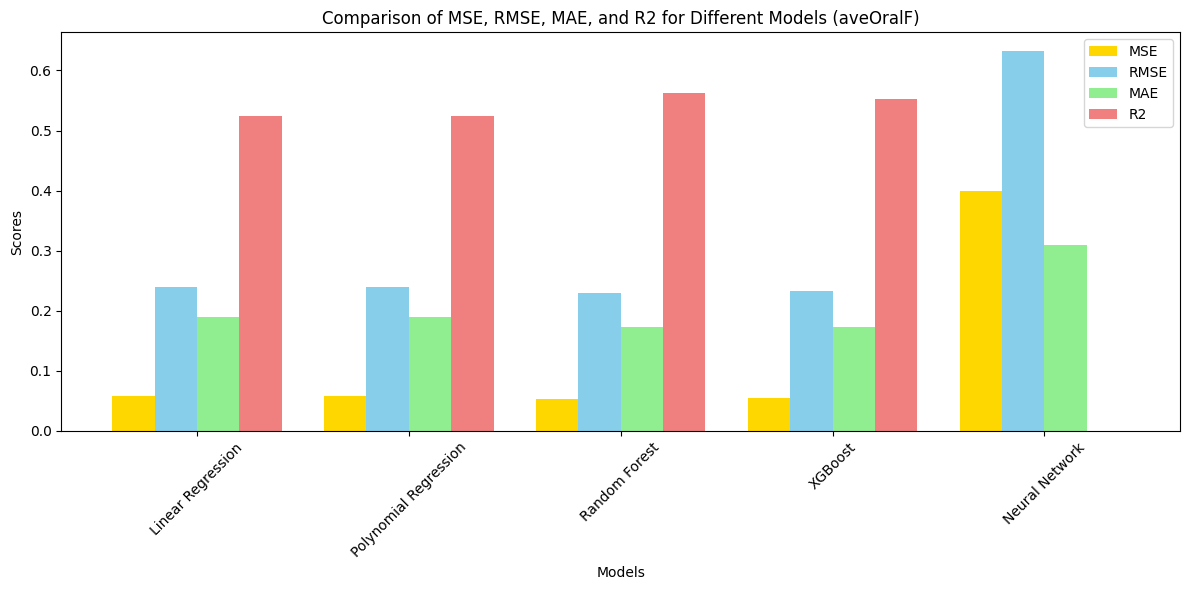

In [28]:
df_reg_results_fast_mode = pd.DataFrame(reg_results_fast_mode).T  

# Plotting all metrics
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(df_reg_results_fast_mode))

ax.bar(index - 1.5 * bar_width, df_reg_results_fast_mode['MSE'], bar_width, label='MSE', color='gold')
ax.bar(index - 0.5 * bar_width, df_reg_results_fast_mode['RMSE'], bar_width, label='RMSE', color='skyblue')
ax.bar(index + 0.5 * bar_width, df_reg_results_fast_mode['MAE'], bar_width, label='MAE', color='lightgreen')
ax.bar(index + 1.5 * bar_width, np.maximum(df_reg_results_fast_mode['R2'], 0), bar_width, label='R2', color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MSE, RMSE, MAE, and R2 for Different Models (aveOralF)')
ax.set_xticks(index)
ax.set_xticklabels(df_reg_results_fast_mode.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



##### Regression Results for Oral temperature

This code evaluates different regression models for predicting oral temperature in monitor mode. It loops through each model, trains it using the training data, and finds the best parameters using GridSearchCV. The best model then makes predictions on the test data, and its performance is measured using metrics like MSE, RMSE, MAE, and R². This helps in selecting the most accurate model for predicting oral temperature in monitor mode.

In [29]:
print("Regression Results for Oral temperature measured in monitor mode (aveOralM):")
reg_results_monitor_mode = {} 

for model_name, (model, params) in reg_models.items():
    metrics, best_params, _ = train_evaluate_model(model, params, X_train_reg, y_train_reg_m, X_test_reg, y_test_reg_m)
    reg_results_monitor_mode[model_name] = metrics
    print(f"{model_name} - Best Params: {best_params}\n{pd.Series(metrics)}")

df_reg_results_monitor_mode = pd.DataFrame(reg_results_monitor_mode) 


Regression Results for Oral temperature measured in monitor mode (aveOralM):
Linear Regression - Best Params: {}
MSE     0.054048
RMSE    0.232482
MAE     0.188374
R2      0.743328
dtype: float64
Polynomial Regression - Best Params: {'model__poly__degree': 1}
MSE     0.054048
RMSE    0.232482
MAE     0.188374
R2      0.743328
dtype: float64
Random Forest - Best Params: {'model__max_depth': 10, 'model__n_estimators': 200}
MSE     0.056496
RMSE    0.237688
MAE     0.181855
R2      0.731704
dtype: float64
XGBoost - Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
MSE     0.057096
RMSE    0.238947
MAE     0.181877
R2      0.728854
dtype: float64
Neural Network - Best Params: {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}
MSE     0.380432
RMSE    0.616792
MAE     0.292238
R2     -0.806658
dtype: float64


For oral temperature measured in monitor mode (aveOralM), Linear and Polynomial Regression perform the best, both achieving the highest R² score of 0.7433. This means they explain about 74% of the variance in the data while maintaining a relatively low error (MSE = 0.0540). Although Random Forest and XGBoost also perform well, their R² values are slightly lower (0.7317 and 0.7288, respectively) with slightly higher errors. These models are still reliable, but they do not outperform simple regression in this case.

In [30]:
df_reg_results_monitor_mode = pd.DataFrame(reg_results_monitor_mode).T  

styled_table_monitor_mode = df_reg_results_monitor_mode.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]},  
    {'selector': 'tbody td', 'props': [('padding', '10px'), ('border', '1px solid black')]},  
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},  
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#ddd')]},  
    {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},  
    {'selector': 'tbody td', 'props': [('text-align', 'center')]}  
])

styled_table_monitor_mode



,MSE,RMSE,MAE,R2
Linear Regression,0.054048,0.232482,0.188374,0.743328
Polynomial Regression,0.054048,0.232482,0.188374,0.743328
Random Forest,0.056496,0.237688,0.181855,0.731704
XGBoost,0.057096,0.238947,0.181877,0.728854
Neural Network,0.380432,0.616792,0.292238,-0.806658


The Neural Network model performs the worst, with a very high MSE (0.3804) and a negative R² (-0.8067), indicating it fails to explain the variance and makes poor predictions. This suggests that a complex deep-learning approach does not work well for this dataset. Since Linear and Polynomial Regression gives the best balance of accuracy and interpretability, they can be used as the most suitable models for predictions of oral temperature in monitor mode.

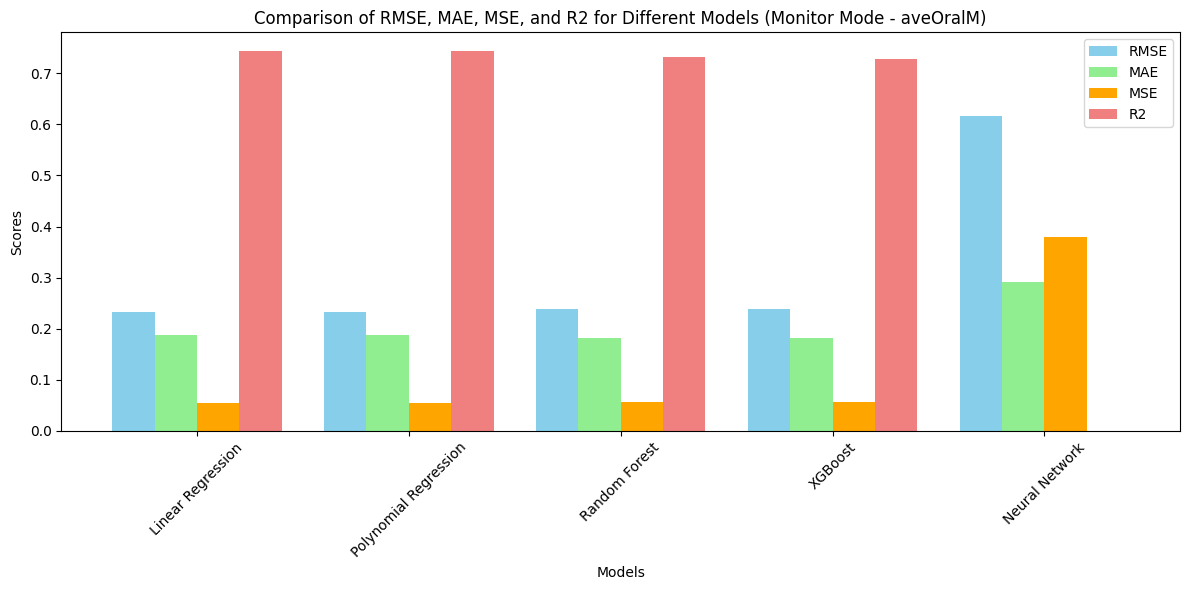

In [32]:
df_reg_results_monitor_mode = pd.DataFrame(reg_results_monitor_mode).T  

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(df_reg_results_monitor_mode))

ax.bar(index - 1.5 * bar_width, df_reg_results_monitor_mode['RMSE'], bar_width, label='RMSE', color='skyblue')
ax.bar(index - 0.5 * bar_width, df_reg_results_monitor_mode['MAE'], bar_width, label='MAE', color='lightgreen')
ax.bar(index + 0.5 * bar_width, df_reg_results_monitor_mode['MSE'], bar_width, label='MSE', color='orange') 
ax.bar(index + 1.5 * bar_width, np.maximum(df_reg_results_monitor_mode['R2'], 0), bar_width, label='R2', color='lightcoral') 

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of RMSE, MAE, MSE, and R2 for Different Models (Monitor Mode - aveOralM)')
ax.set_xticks(index)
ax.set_xticklabels(df_reg_results_monitor_mode.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()





##### Results for Samples

This code selects the best models for predicting oral temperature in fast and monitor modes. Random Forest is used for fast mode, while Linear Regression is used for monitor mode. A few test samples are chosen, and predictions are made using the trained models. The actual and predicted values are compared, and the absolute errors are calculated. The results are stored in a DataFrame for easy analysis. Finally, the prediction results are displayed, helping to evaluate model accuracy.

In [33]:
best_model_fast = train_evaluate_model(RandomForestRegressor(), 
                                       {'model__n_estimators': [100], 'model__max_depth': [None]},
                                       X_train_reg, y_train_reg_f, X_test_reg, y_test_reg_f)[2]

best_model_monitor = train_evaluate_model(LinearRegression(), {}, 
                                         X_train_reg, y_train_reg_m, X_test_reg, y_test_reg_m)[2]

sample_indices = [42, 123, 203, 90] 
X_samples = X_test_reg.iloc[sample_indices]
y_true_fast = y_test_reg_f.iloc[sample_indices]
y_true_monitor = y_test_reg_m.iloc[sample_indices]

y_pred_fast = best_model_fast.predict(X_samples)
y_pred_monitor = best_model_monitor.predict(X_samples)

results_df = pd.DataFrame({
    'Sample': sample_indices,
    'Actual_Fast_Mode': y_true_fast.values,
    'Predicted_Fast_Mode': y_pred_fast,
    'Error_Fast_Mode': np.abs(y_true_fast.values - y_pred_fast),
    'Actual_Monitor_Mode': y_true_monitor.values,
    'Predicted_Monitor_Mode': y_pred_monitor,
    'Error_Monitor_Mode': np.abs(y_true_monitor.values - y_pred_monitor)
})

print("Prediction Results for Selected Samples:")
display(results_df)



Prediction Results for Selected Samples:


,Sample,Actual_Fast_Mode,Predicted_Fast_Mode,Error_Fast_Mode,Actual_Monitor_Mode,Predicted_Monitor_Mode,Error_Monitor_Mode
0,42,37.55,37.2555,0.2945,37.69,37.329295,0.360705
1,123,37.20,37.0475,0.1525,37.29,37.428280,0.138280
2,203,36.95,36.9785,0.0285,36.99,37.112228,0.122228
3,90,36.65,36.8940,0.2440,36.69,36.902028,0.212028


The table presents the actual and predicted oral temperatures for four samples in both fast and monitor modes. In fast mode, for sample 42, the actual temperature was 37.55°C, and the predicted value was 37.26°C, with an error of 0.29°C. For sample 123, the predicted value was 37.05°C, with a smaller error of 0.15°C. In monitor mode, the actual temperature for sample 42 was 37.69°C, while the model predicted 37.33°C, resulting in an error of 0.36°C. For sample 123, the predicted monitor value was 37.43°C, showing a smaller error of 0.14°C. These results indicate that the models performed reasonably well with some variations in errors across different samples.


##### Shap 

The function creates a pipeline that combines data preprocessing and model fitting into one step. It then trains the model using the training data, and transforms the test data using the same preprocessing steps. Depending on the model type, it selects the appropriate SHAP explainer—TreeExplainer for Random Forest and LinearExplainer for Linear Regression. SHAP values are calculated to understand how each feature affects the model's predictions. A summary plot is generated to show the importance of each feature in making predictions. Finally, the SHAP values are returned for interpretation. This process helps explain the model’s decision-making by showing which features are most impactful.

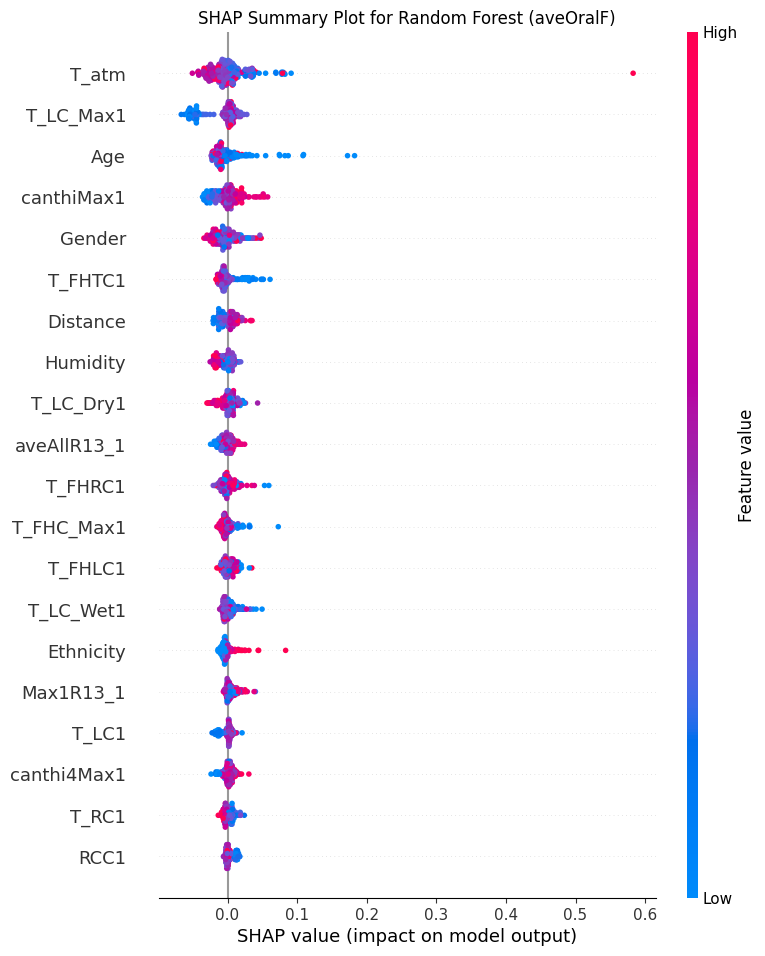

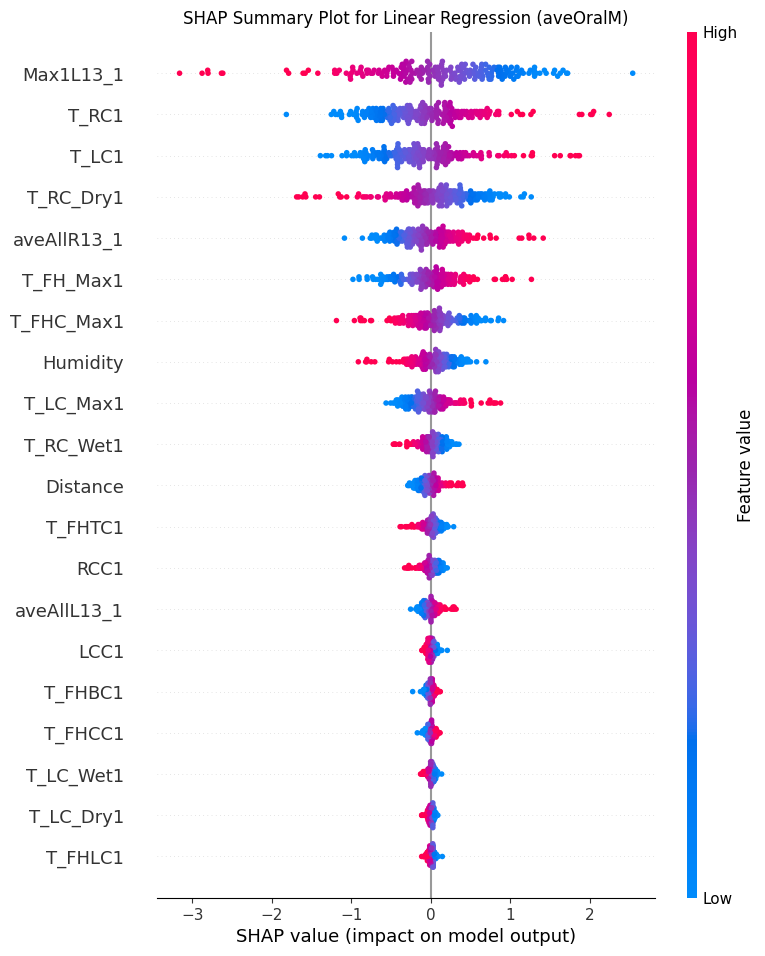

In [69]:
def compute_shap(model, X_train, X_test, model_name, target_name):
    pipeline = SklearnPipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    
    if model_name == 'Random Forest':
        explainer = shap.TreeExplainer(pipeline.named_steps['model'])
    elif model_name == 'Linear Regression':
        explainer = shap.LinearExplainer(pipeline.named_steps['model'], X_test_transformed)
    
    shap_values = explainer.shap_values(X_test_transformed)
    
    shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns, show=False)
    plt.title(f"SHAP Summary Plot for {model_name} ({target_name})")
    plt.show()
    
    return shap_values

shap_values_fast = compute_shap(RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
                                X_train_reg, X_test_reg, 'Random Forest', 'aveOralF')

shap_values_monitor = compute_shap(LinearRegression(),
                                   X_train_reg, X_test_reg, 'Linear Regression', 'aveOralM')

#### Classification 

##### Baseline Model

The code suppresses warnings related to UserWarning from sklearn using the warnings.filterwarnings function its a warning regarding my computer does not affect any performance. The next part defines a function evaluate_baseline_classifier, which creates a baseline classifier (DummyClassifier) to predict the majority class (most frequent value) for the target. This classifier is trained on the given training data (X_train and y_train) and tested on the test data (X_test and y_test). After making predictions, it evaluates the classification metrics (such as accuracy, precision, recall) using the evaluate_classification function. Finally, the function is called for two different targets: aveOralF and aveOralM.


In [62]:
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

def evaluate_baseline_classifier(X_train, y_train, X_test, y_test, target_name):
    baseline_clf = DummyClassifier(strategy="most_frequent")
    baseline_clf.fit(X_train, y_train)
    y_pred_baseline = baseline_clf.predict(X_test)
    metrics_clf = evaluate_classification(y_test, y_pred_baseline)
    print(f"Baseline Metrics for {target_name} (Classification):\n", pd.Series(metrics_clf))

evaluate_baseline_classifier(X_train_clf_f, y_train_clf_f, X_test_clf_f, y_test_clf_f, 'aveOralF')
evaluate_baseline_classifier(X_train_clf_m, y_train_clf_m, X_test_clf_m, y_test_clf_m, 'aveOralM')


Baseline Metrics for aveOralF (Classification):
 Accuracy     0.936275
Precision    0.000000
Recall       0.000000
F1           0.000000
dtype: float64
Baseline Metrics for aveOralM (Classification):
 Accuracy     0.892157
Precision    0.000000
Recall       0.000000
F1           0.000000
dtype: float64


The baseline metrics show that the model predicts only the majority class (the most frequent class) for both targets, aveOralF and aveOralM. The accuracy is relatively high (93.63% for aveOralF and 89.22% for aveOralM), which means the majority class is predicted well. However, the precision, recall, and F1 scores are all 0. This indicates that the model did not predict any instances of the minority class, leading to a lack of true positive predictions. The low F1 score reflects the poor performance in detecting the minority class, despite the high accuracy.

##### Data Splitting for Classification

This code splits the dataset into training and testing sets for two classification tasks: y_clf_f and y_clf_m. It uses train_test_split from scikit-learn with 80% of the data for training and 20% for testing. The stratify parameter maes sure that the class distribution in both the training and testing sets is similar to the original dataset. The random_state=42 ensures that the split is reproducible. It creates separate training and testing sets for both tasks: fast mode (y_clf_f) and monitor mode (y_clf_m).

In [34]:
X_train_clf_f, X_test_clf_f, y_train_clf_f, y_test_clf_f = train_test_split(X, y_clf_f, test_size=0.2, random_state=42, stratify=y_clf_f)
X_train_clf_m, X_test_clf_m, y_train_clf_m, y_test_clf_m = train_test_split(X, y_clf_m, test_size=0.2, random_state=42, stratify=y_clf_m)

##### Classification Models

##### Logistic Regression 
Logistic Regression is used for binary classification by estimating the probability of a class using the sigmoid function. It predicts class **1** if the probability is greater than 0.5 and class **0** otherwise.  

The probability is calculated as:  
$$
P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n)}}
$$  

- **P(Y=1)** → The probability that the dependent variable **Y** equals 1.
- **b₀** → The intercept (constant term), which is the base value of the probability when all independent variables are zero.
- **b₁, b₂, ..., bₙ** → The coefficients (weights) for each feature (X₁, X₂, ..., Xₙ). These represent the impact of each feature on the probability of Y being 1.
- **X₁, X₂, ..., Xₙ** → The independent variables used to predict the probability.
- **e** → The base of the natural logarithm, approximately equal to 2.71828.
---

##### Random Forest for classification
Random Forest is used for multi-class classification by aggregating predictions from multiple decision trees. Each tree independently classifies the input, and the final class is determined by majority voting:  

$$
\hat{y} = \text{mode}(T_1(X), T_2(X), ..., T_n(X))
$$  

It helps reduce overfitting and improves accuracy in classification tasks.  

---

##### XGBoost for classification (Extreme Gradient Boosting) 
XGBoost is a boosting algorithm that improves classification by sequentially correcting misclassified samples. It minimizes a loss function iteratively to optimize decision trees.  It is widely used in machine learning tasks normally used to achieve high accuracy.

The objective function combines the loss and regularization terms:  
$$
L = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega (T_k)
$$  

- **L** → The total loss function, which combines both the data loss and regularization term.
- **n** → The total number of data points (observations).
- **l(yᵢ, ŷᵢ)** → The loss function for each data point **i**, where **yᵢ** is true value and **ŷᵢ** is predicted value.
- **K** → The number of trees in the ensemble.
- **Ω(Tₖ)** → The regularization term for each tree **k**, which penalizes complex models to avoid overfitting. This term helps to control the complexity of the model (e.g., depth of trees). 

---

##### Neural Network for classification (MLP - Multi-Layer Perceptron)
A neural network classifies inputs by passing data through multiple layers of neurons. Each neuron computes:  

$$
Z = W_1X_1 + W_2X_2 + ... + W_nX_n + b
$$  
$$
A = f(Z)
$$  

where \( f(Z) \) is an activation function (e.g., ReLU, Sigmoid). The final output determines the class, and the network learns through backpropagation.  

---



In [35]:
#  Models
clf_models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), 
                            {'model__C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=42), 
                      {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10]}),
    'XGBoost': (XGBClassifier(random_state=42), 
                {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]}),
    'Neural Network': (MLPClassifier(random_state=42, max_iter=1000), 
                       {'model__hidden_layer_sizes': [(100,), (50, 50)], 'model__alpha': [0.0001, 0.001]})
}


The numbers in the parameters help control how the models learn from data. In Logistic Regression, C values like 0.1, 1, and 10 decide how much regularization is applied, where smaller values prevent overfitting. In Random Forest, n_estimators (100, 200) means how many trees are used, and max_depth (None, 10) controls how deep each tree can grow. A deeper tree captures more patterns but can overfit. XGBoost uses n_estimators (100, 200) to set boosting rounds and learning_rate (0.01, 0.1) to control step size, with lower values making learning slower but stable.



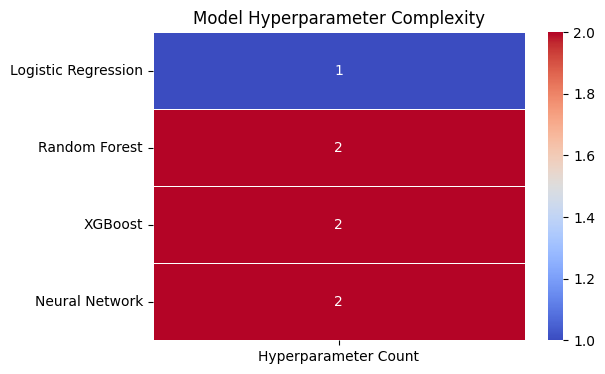

In [36]:
# Define model names and hyperparameter counts
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']
hyperparam_counts = [1, 2, 2, 2]  # Count of hyperparameters

# Convert to DataFrame
df_complexity = pd.DataFrame(hyperparam_counts, index=model_names, columns=["Hyperparameter Count"])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_complexity, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")
plt.title("Model Hyperparameter Complexity")
plt.show()

For Neural Networks, hidden_layer_sizes (100, or 50-50) define the number of neurons in each layer, affecting complexity. A single 100 neuron layer is simpler, while two layers of 50 neurons each add depth for better learning. Alpha (0.0001, 0.001) is a regularization term that prevents overfitting by reducing the influence of large weights. A smaller alpha allows more flexibility, while a larger one makes learning stricter. These numbers are tested with different values to find the best combination for accurate classification without overfitting or underfitting.

#### Evaluation matrix

- **TP (True Positive)**: Correctly predicted positive cases (e.g., the model correctly identifies a sick patient).
- **TN (True Negative)**: Correctly predicted negative cases (e.g., the model correctly identifies a healthy patient).
- **FP (False Positive)**: Incorrectly predicted positive cases (e.g., the model incorrectly labels a healthy patient as sick).
- **FN (False Negative)**: Incorrectly predicted negative cases (e.g., the model fails to identify a sick patient as positive).

##### Accuracy
Accuracy measures the proportion of correct predictions (both positive and negative) out of all predictions made by the model. It's useful when the dataset is balanced. However, with imbalanced data, accuracy can be misleading since it doesn’t consider the types of errors made. A high accuracy indicates that the model is making more correct predictions overall. It is calculated as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

##### Precision
Precision tells us how many of the predicted positive cases were actually correct. This is especially important in scenarios where false positives are costly. For instance, in a classification model predicting a specific class, if precision is high, the model makes fewer incorrect positive predictions. It’s calculated as:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

##### Recall
Recall measures how well the model identifies all actual positive cases. This metric is crucial when missing any positive case could be problematic, such as in fraud detection or medical diagnosis, where false negatives are costly. High recall means the model is identifying most of the actual positives, while low recall indicates many are missed. It is calculated as:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

##### F1-score
The F1-score balances Precision and Recall by taking their harmonic mean. It’s particularly useful when both false positives and false negatives are important. A high F1-score suggests a good trade-off between Precision and Recall, whereas a low F1-score indicates that at least one of these metrics is lacking. It is calculated as:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

##### ROC AUC & PR AUC

- ROC AUC measures the model’s ability to distinguish between classes and is useful when the classes are balanced. A high ROC AUC means the model is good at separating positive and negative cases.
- PR AUC (Precision-Recall AUC) is more relevant when dealing with imbalanced data, as it focuses on the trade-off between Precision and Recall. A high PR AUC value indicates better performance when the positive class is rare, which is often the case in many real-world classification problems.


In [37]:
def evaluate_classification(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }
    if y_proba is not None:
        metrics.update({
            'ROC AUC': roc_auc_score(y_true, y_proba),
            'PR AUC': average_precision_score(y_true, y_proba)  # AUC PR (Precision-Recall AUC)
        })
    return metrics



The evaluate_classification function returns a dictionary of performance metrics based on the model's predictions. It provides numerical values that indicate how well the model performed in distinguishing between the actual and predicted classes

The optimize_threshold function is used to find the best threshold for classifying positive predictions. It begins by obtaining the predicted probabilities for the positive class from the model using predict_proba, which returns a probability for each instance in the test set. This is followed by computing the precision and recall values at different thresholds using precision_recall_curve, which evaluates the model’s performance over various cut-off points. The function then calculates the F1 score for each threshold, which is the harmonic mean of precision and recall. Finally, it identifies the threshold that gives the highest F1 score using np.argmax(f1_scores) and returns both this threshold and the corresponding F1 score.

In [38]:
def optimize_threshold(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    optimal_idx = np.argmax(f1_scores)
    return thresholds[optimal_idx], f1_scores[optimal_idx]

By optimizing the threshold, the model can make better decisions, especially in imbalanced datasets where the costs of false positives and false negatives differ. The optimal threshold is the one that strikes a balance between precision and recall, maximizing the F1 score. A high F1 score indicates that the model is performing well in terms of both identifying true positives and minimizing false positives. The function provides the best threshold for making classification decisions and the corresponding F1 score, which reflects the model's efficiency in managing these trade-offs. This ensures the classifier performs optimally in scenarios where precision and recall need to be balanced.



The train_evaluate_model_clf function trains and evaluates a classification model using a series of steps. It sets up a pipeline that includes preprocessing, SMOTE (which balances the dataset by creating synthetic data points for the minority class), and the model. The function accepts a model and its hyperparameters, and performs a grid search to find the best settings using 5-fold cross-validation, for optimizing the ROC AUC score.
After finding the best model, it uses it to predict the test data. It then determines the best classification threshold using the optimize_threshold function. The model’s performance is evaluated using metrics like precision, recall, F1 score, and ROC AUC. At the end, the function returns the metrics, the best hyperparameters, and the trained model.

In [40]:
def train_evaluate_model_clf(model, params, X_train, y_train, X_test, y_test):
    pipeline = ImblearnPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_proba = best_model.predict_proba(X_test)[:, 1]
    optimal_thresh, optimal_f1 = optimize_threshold(best_model, X_test, y_test)
    y_pred_optimal = (y_proba >= optimal_thresh).astype(int)
    metrics = evaluate_classification(y_test, y_pred_optimal, y_proba)
    metrics['Optimal Threshold'] = optimal_thresh
    return metrics, grid_search.best_params_, best_model

The results of this function will give you a detailed performance evaluation of the model based on the optimal threshold. The grid search provides the best set of hyperparameters that improve the model’s performance on the test set. The metrics returned will include not only the traditional classification scores like precision and recall but also the ROC AUC and the optimal threshold, which ensures that the model is fine-tuned for the best trade-off between precision and recall. The optimal threshold helps in reducing misclassifications, improving the overall performance in scenarios with class imbalance. The output includes the best model, so it can be directly used for predictions or further analysis.

##### Classification Results for Oral Temperature Measured in Fast Mode

The classification results for a target variable aveOralF, which represents oral temperature measured in fast mode. It defines a dictionary clf_results_oral_temperature_fast_mode to store the model results. For each model in clf_models, it trains and evaluates the model using the train_evaluate_model_clf function, and then stores the results (metrics) in the dictionary. It prints the best hyperparameters and the evaluation metrics for each model. Finally, the results are converted into a pandas DataFrame for easy viewing.


In [41]:
print("\nClassification Results for Oral Temperature Measured in Fast Mode (aveOralF):")
clf_results_oral_temperature_fast_mode = {}

X_train, y_train, X_test, y_test = X_train_clf_f, y_train_clf_f, X_test_clf_f, y_test_clf_f
target_name = 'aveOralF'

print(f"\nTarget: {target_name}")
for model_name, (model, params) in clf_models.items():
    metrics, best_params, _ = train_evaluate_model_clf(model, params, X_train, y_train, X_test, y_test)
    clf_results_oral_temperature_fast_mode[model_name] = metrics
    print(f"{model_name} - Best Params: {best_params}\n{pd.Series(metrics)}")

clf_results_oral_temperature_fast_mode_df = pd.DataFrame(clf_results_oral_temperature_fast_mode)



Classification Results for Oral Temperature Measured in Fast Mode (aveOralF):

Target: aveOralF
Logistic Regression - Best Params: {'model__C': 0.1}
Accuracy             0.965686
Precision            0.714286
Recall               0.769231
F1                   0.740741
ROC AUC              0.979058
PR AUC               0.746462
Optimal Threshold    0.947552
dtype: float64
Random Forest - Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy             0.950980
Precision            0.571429
Recall               0.923077
F1                   0.705882
ROC AUC              0.968385
PR AUC               0.653604
Optimal Threshold    0.420726
dtype: float64
XGBoost - Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Accuracy             0.960784
Precision            0.727273
Recall               0.615385
F1                   0.666667
ROC AUC              0.967378
PR AUC               0.669248
Optimal Threshold    0.933188
dtype: float64
Neural Netwo

The results show that each model has its strengths and weaknesses. Logistic Regression performs best in terms of accuracy (96.57%) and ROC AUC (97.91%), suggesting it is effective at distinguishing between classes. However, its precision (71.43%) and recall (76.92%) are moderate. Random Forest has the highest recall (92.31%), meaning it captures most of the positive cases but has lower precision (57.14%). XGBoost achieves a balance between accuracy (96.08%) and recall (61.54%), while Neural Network shows the highest recall (84.62%) but lower precision (57.89%).

In [42]:
clf_results_oral_temperature_fast_mode_df = pd.DataFrame(clf_results_oral_temperature_fast_mode).T  # Transpose for better display

styled_table_oral_temperature_fast_mode = clf_results_oral_temperature_fast_mode_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]},  # Header styles
    {'selector': 'tbody td', 'props': [('padding', '10px'), ('border', '1px solid black')]},  # Cell padding and border
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},  # Alternating row colors
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#ddd')]},  # Hover effect
    {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},  # Header border
    {'selector': 'tbody td', 'props': [('text-align', 'center')]}  # Center alignment for values
])


styled_table_oral_temperature_fast_mode



,Accuracy,Precision,Recall,F1,ROC AUC,PR AUC,Optimal Threshold
Logistic Regression,0.965686,0.714286,0.769231,0.740741,0.979058,0.746462,0.947552
Random Forest,0.950980,0.571429,0.923077,0.705882,0.968385,0.653604,0.420726
XGBoost,0.960784,0.727273,0.615385,0.666667,0.967378,0.669248,0.933188
Neural Network,0.950980,0.578947,0.846154,0.687500,0.948852,0.621878,0.102236


Among these models, Logistic Regression stands out as the best option for this task. It strikes a good balance between accuracy and ROC AUC, which is important for distinguishing between classes. Although its recall is not the highest, its high accuracy and optimal threshold (0.95) make it a solid choice for general performance. If the priority is to avoid misclassification of positive cases, other models like Random Forest or Neural Network could be considered. However, Logistic Regression offers overall reliability in performance.

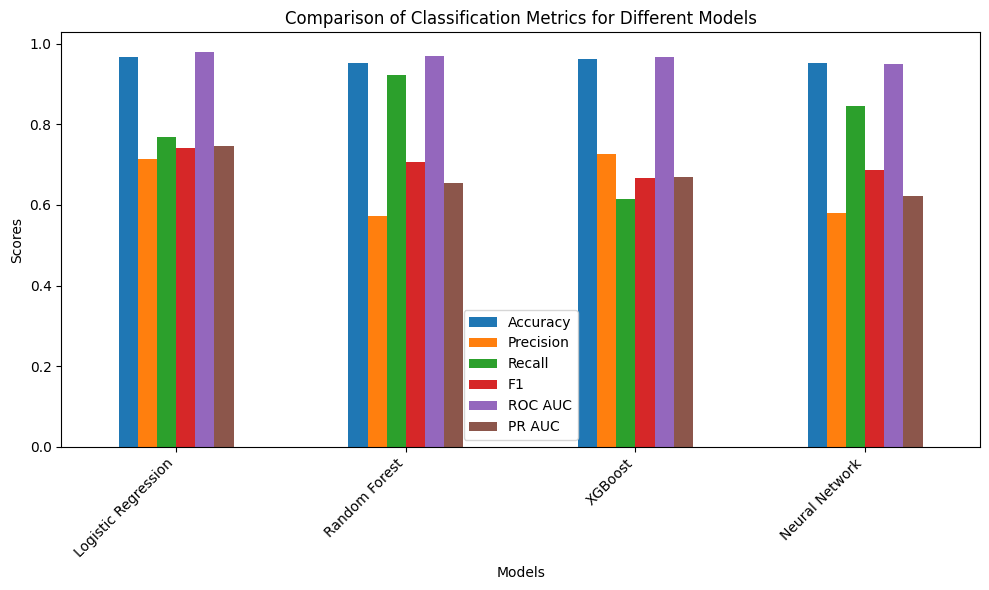

In [44]:
import matplotlib.pyplot as plt

metrics_to_plot = clf_results_oral_temperature_fast_mode_df[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC']]

metrics_to_plot.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Classification Metrics for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


##### Classification Results for Oral Temperature Measured in Monitor Mode

This code evaluates multiple classification models for predicting oral temperature measured in Monitor Mode (aveOralM). It loops through a dictionary of models and their hyperparameters, training and testing each model using the train_evaluate_model_clf function. For each model, it prints the best hyperparameters and the evaluation metrics such as accuracy, precision, recall, F1 score, and AUC. These results are stored in a dictionary and then converted into a pandas DataFrame for better display and analysis. The final DataFrame (clf_results_oral_monitor_mode_df) shows all the metrics for each model in one table.

In [43]:
print("\nClassification Results for Oral Temperature Measured in Monitor Mode (aveOralM):")
clf_results_oral_monitor_mode = {}

X_train, y_train, X_test, y_test = X_train_clf_m, y_train_clf_m, X_test_clf_m, y_test_clf_m
target_name = 'aveOralM'

print(f"\nTarget: {target_name}")
for model_name, (model, params) in clf_models.items():
    metrics, best_params, _ = train_evaluate_model_clf(model, params, X_train, y_train, X_test, y_test)
    clf_results_oral_monitor_mode[model_name] = metrics
    print(f"{model_name} - Best Params: {best_params}\n{pd.Series(metrics)}")

clf_results_oral_monitor_mode_df = pd.DataFrame(clf_results_oral_monitor_mode)



Classification Results for Oral Temperature Measured in Monitor Mode (aveOralM):

Target: aveOralM
Logistic Regression - Best Params: {'model__C': 0.1}
Accuracy             0.955882
Precision            0.760000
Recall               0.863636
F1                   0.808511
ROC AUC              0.975774
PR AUC               0.887390
Optimal Threshold    0.890744
dtype: float64
Random Forest - Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy             0.965686
Precision            0.800000
Recall               0.909091
F1                   0.851064
ROC AUC              0.968531
PR AUC               0.842216
Optimal Threshold    0.586955
dtype: float64
XGBoost - Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Accuracy             0.960784
Precision            0.791667
Recall               0.863636
F1                   0.826087
ROC AUC              0.978771
PR AUC               0.871364
Optimal Threshold    0.795753
dtype: float64
Neural Ne

The classification results for the oral temperature measured in Monitor Mode (aveOralM) show that all models perform well, but there are some distinctions. The Logistic Regression model achieved a balance of precision and recall, with an F1 score of 0.808511, which is strong, but its ROC AUC (0.975774) and PR AUC (0.887390) indicate it performs well in distinguishing the positive class. Random Forest showed the best overall performance in terms of recall (0.909091) and F1 score (0.851064), with a good balance between precision and recall. XGBoost came close, with an F1 score of 0.826087 and PR AUC of 0.871364, indicating a strong ability to identify positive cases. The Neural Network model had a slightly lower F1 score (0.790698) and precision (0.809524), but still performed well with a solid ROC AUC and PR AUC score.

In [45]:
clf_results_oral_monitor_mode_df = pd.DataFrame(clf_results_oral_monitor_mode).T

styled_table_oral_monitor_mode = clf_results_oral_monitor_mode_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('padding', '10px'), ('border', '1px solid black')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#ddd')]},
    {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]}
])

styled_table_oral_monitor_mode


,Accuracy,Precision,Recall,F1,ROC AUC,PR AUC,Optimal Threshold
Logistic Regression,0.955882,0.760000,0.863636,0.808511,0.975774,0.887390,0.890744
Random Forest,0.965686,0.800000,0.909091,0.851064,0.968531,0.842216,0.586955
XGBoost,0.960784,0.791667,0.863636,0.826087,0.978771,0.871364,0.795753
Neural Network,0.955882,0.809524,0.772727,0.790698,0.967283,0.865133,0.899315


The Random Forest model appears to be the best choice for this task, with an excellent balance of precision, recall, and F1 score. Its high recall (0.909091) ensures that it captures the majority of the positive cases, while the high precision (0.800000) indicates it is accurate in its positive predictions. The F1 score of 0.851064 shows the model performs well in balancing both precision and recall. Additionally, Random Forest’s robust performance is also reflected in its ROC AUC and PR AUC, making it a strong contender for this classification task.

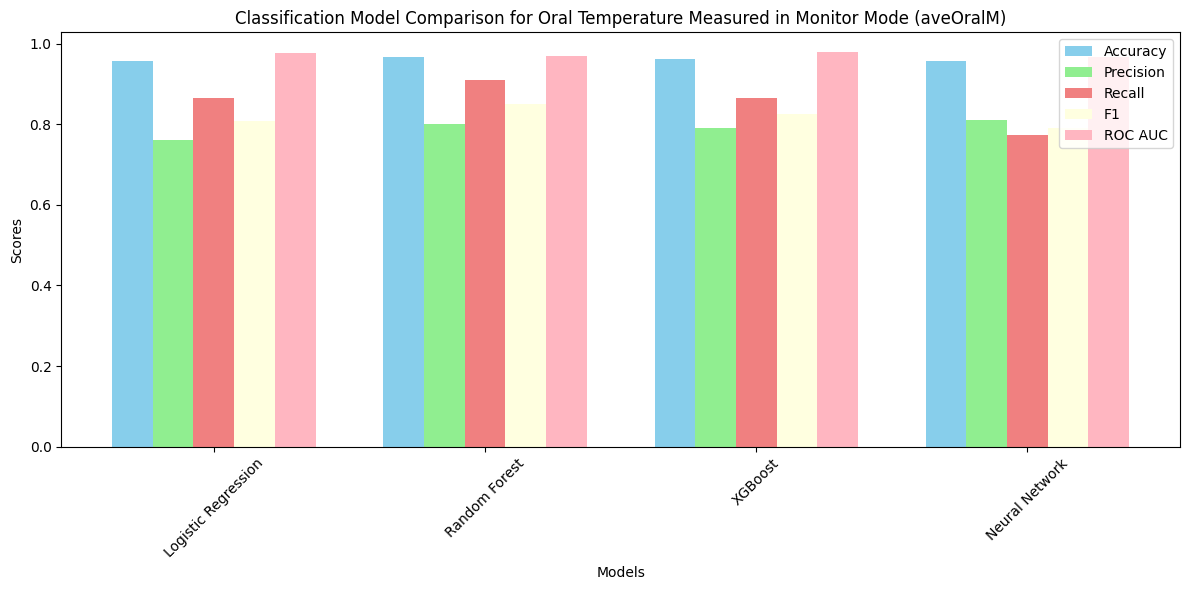

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15
index = np.arange(len(clf_results_oral_monitor_mode_df))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, clf_results_oral_monitor_mode_df[metric], bar_width, label=metric, color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Model Comparison for Oral Temperature Measured in Monitor Mode (aveOralM)')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(clf_results_oral_monitor_mode_df.index, rotation=45)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


##### Samples

This code defines the best models for both temperature classification tasks: one for Fast Mode using Logistic Regression and one for Monitor Mode using Random Forest. It then selects a few sample data points from the test sets to make predictions. The get_predictions function is used to get both predicted labels and probabilities for the selected samples, based on a specific threshold. The results are stored in two separate DataFrames, results_temperature_f for Fast Mode and results_temperature_m for Monitor Mode, containing the actual values, predicted values, probabilities, and whether the prediction was correct.

In [49]:
# best models for both targets (Classification models)
best_model_temperature_f = train_evaluate_model_clf(LogisticRegression(max_iter=1000, random_state=42),
                                                   {'model__C': [0.1]},
                                                   X_train_clf_f, y_train_clf_f, X_test_clf_f, y_test_clf_f)[2]

best_model_temperature_m = train_evaluate_model_clf(RandomForestClassifier(random_state=42),
                                                   {'model__n_estimators': [100], 'model__max_depth': [10]},
                                                   X_train_clf_m, y_train_clf_m, X_test_clf_m, y_test_clf_m)[2]

sample_indices = [21, 107, 199, 87]
X_samples_f = X_test_clf_f.iloc[sample_indices]  
X_samples_m = X_test_clf_m.iloc[sample_indices]
y_true_f = y_test_clf_f.iloc[sample_indices]
y_true_m = y_test_clf_m.iloc[sample_indices]

# predictions
def get_predictions(model, X_samples, threshold):
    y_proba = model.predict_proba(X_samples)[:, 1] 
    y_pred = (y_proba >= threshold).astype(int)
    return y_pred, y_proba


y_pred_f, y_proba_f = get_predictions(best_model_temperature_f, X_samples_f, 0.919063)

y_pred_m, y_proba_m = get_predictions(best_model_temperature_m, X_samples_m, 0.627239)

#  DataFrame
results_temperature_f = pd.DataFrame({
    'Actual_FastMode': y_true_f.values,
    'Predicted_FastMode': y_pred_f,
    'Probability_FastMode': y_proba_f,
    'Correct_FastMode': (y_true_f.values == y_pred_f).astype(int)
})

results_temperature_m = pd.DataFrame({
    'Actual_MonitorMode': y_true_m.values,
    'Predicted_MonitorMode': y_pred_m,
    'Probability_MonitorMode': y_proba_m,
    'Correct_MonitorMode': (y_true_m.values == y_pred_m).astype(int)
})


print("Temperature Predictions (Fast Mode):")
display(results_temperature_f)

print("\nTemperature Predictions (Monitor Mode):")
display(results_temperature_m)



Temperature Predictions (Fast Mode):


,Actual_FastMode,Predicted_FastMode,Probability_FastMode,Correct_FastMode
0,0,0,0.154245,1
1,0,0,0.137510,1
2,0,0,0.003289,1
3,0,0,0.676765,1



Temperature Predictions (Monitor Mode):


,Actual_MonitorMode,Predicted_MonitorMode,Probability_MonitorMode,Correct_MonitorMode
0,0,0,0.07202,1
1,0,0,0.10510,1
2,0,0,0.00000,1
3,0,0,0.02000,1


The results display predictions for both Fast Mode and Monitor Mode temperature classifications. For each sample, it shows the actual value, the predicted value, the probability of the model predicting the positive class, and whether the prediction was correct.In both cases, the models seem to perform well in terms of accuracy (as they correctly predicted the class for all samples). The "Correct" column confirms that the model was accurate. All predictions for the selected samples are 0 (no fever) as the probabilities are less than the given threshold. If it would have been higher, it would have been positives. Dataset is imbalanced, samples are random

##### Confusion matrix

The confusion matrix for the models helps assess how well each one classifies data. For the Fast Mode (aveOralF), the model used is a logistic regression classifier, and for the Monitor Mode (aveOralM), a random forest classifier is applied. The matrix compares actual outcomes with predicted results, revealing the number of true positives, true negatives, false positives, and false negatives. This gives insights into the model's performance—whether it correctly predicts fever or not. By visualizing the confusion matrix as a heatmap, it becomes easier to identify areas where the models excel or make mistakes. This tool is particularly useful for understanding how each model handles classification errors.

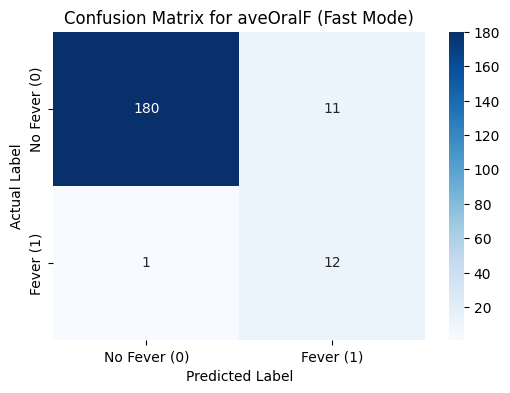

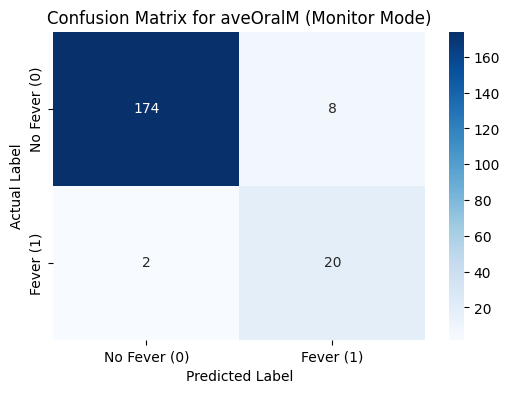

In [66]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['No Fever (0)', 'Fever (1)']

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

y_pred_f = (best_model_temperature_f.predict(X_test_clf_f) > 0.5).astype(int).ravel()
y_pred_m = (best_model_temperature_m.predict(X_test_clf_m) > 0.5).astype(int).ravel()

plot_confusion_matrix(y_test_clf_f, y_pred_f, "Confusion Matrix for aveOralF (Fast Mode)")
plot_confusion_matrix(y_test_clf_m, y_pred_m, "Confusion Matrix for aveOralM (Monitor Mode)")



##### Roc Curve

The code plots ROC curves for two models using test data. It calculates the false positive rate (FPR) and true positive rate (TPR) to compute the AUC score. The ROC curve is displayed with labels and a diagonal line representing random classification. The title for each plot indicates the model type and mode.

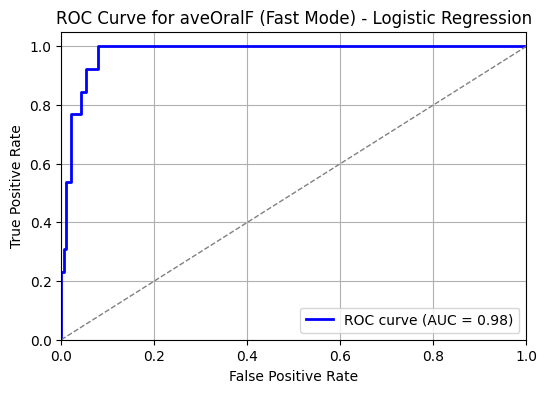

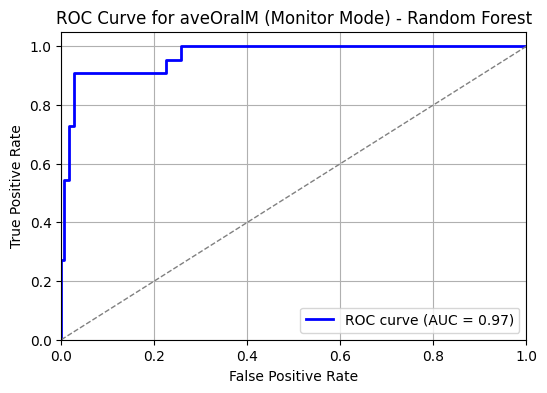

In [72]:
def plot_roc_curve(model, X_test, y_test, title):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(best_model_temperature_f, X_test_clf_f, y_test_clf_f, 
               "ROC Curve for aveOralF (Fast Mode) - Logistic Regression")

plot_roc_curve(best_model_temperature_m, X_test_clf_m, y_test_clf_m, 
               "ROC Curve for aveOralM (Monitor Mode) - Random Forest")

##### Conclusion 

In this project, we analyzed infrared thermography data to predict oral temperatures in two modes: Fast Mode (aveOralF) and Monitor Mode (aveOralM) using both regression and classification methods. For regression, Random Forest performed best in Fast Mode with an R² of 0.5617, showing it’s good at capturing complex patterns in the data. Linear Regression was better in Monitor Mode with an R² of 0.7433, indicating a simpler relationship between the features and the target. In classification, Logistic Regression gave balanced results in Fast Mode (F1: 0.7407), while Random Forest excelled in Monitor Mode (F1: 0.8511), especially in detecting fever cases with a high recall (0.9091).

These results show that choosing the right model is important. Random Forest is great for complex data, while Linear Regression is better for simpler patterns. Proper data preprocessing, like handling missing values with KNN and managing outliers with Winsorization, helped improve model performance. Although SHAP analysis wasn’t fully explored, it helped display which features influence the model's predictions. The baseline models, which used simple predictions like averages, performed poorly, highlighting the value of using more advanced methods.


##### Future improvements

Future improvements could include more tuning of hyperparameters to improve model accuracy and using ensemble methods to combine the strengths of the best models. Exploring LSTMs could help capture time-based patterns in the data. Testing other models like SVM or KNN might lead to a more variation of results. These improvements could make the system more reliable and accurate. Overall, refining the models and experimenting with new techniques will help create a more effective solution for predicting temperatures.









##### References 

1- Dataset - https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset

2 - Winsorized https://www.investopedia.com/terms/w/winsorized_mean.asp#:~:text=SolStock%20%2F%20Getty%20Images-,What%20Is%20the%20Winsorized%20Mean%3F,or%20outliers%2C%20on%20the%20calculation.